In [672]:
import random
import time
import tracemalloc

import numpy as np
from optimize.util import optimize
import regression as reg
from matplotlib import pyplot as plt
import tests as tests
from scipy.optimize import minimize, least_squares
import util

In [673]:
test = tests.create_test(func=util.plus(lambda x:util.polynomial(5)(x)(np.array([1., 0., -50., 0., 1.])), util.random_function(1000)),
                           model_name='pol',
                           point=np.array([10000., 1000., 1000., 10000., -1000.]),
                           params=5,
                           begin=-10,
                           end=10,
                           steps=1000
                           )

In [674]:
print("model =", test.model)
print("start = ", test.init_point)
print("function = ", test.func)

model = (<function polynomial_test.<locals>.<lambda> at 0x00000224E0B505E0>, <function polynomial_jac.<locals>.<lambda> at 0x00000224E0B50670>)
start =  [10000.  1000.  1000. 10000. -1000.]
function =  <function combine.<locals>.<lambda> at 0x000002249AB3FF70>


In [675]:
func, jac = test.model
gn =  optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='GAUSS-NEWTON')
pdl = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='POWELL-DOG-LEG')
bfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='BFGS')
lbfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='L-BFGS')
sgd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='SGD')
mnt = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='MOMENTUM')
nst = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='NESTEROV')
agd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADA-GRAD')
rms = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='RMS-PROP')
adam = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADAM')

eps = 1e-8
max_iters = 2000
learning_rate = 0.01
batch_size = 1

res = {
    'GAUSS-NEWTON': gn(test.X, test.Y, test.init_point, eps, max_iters),
    'POWELL-DOG-LEG': pdl(test.X, test.Y, test.init_point, 1000, eps, max_iters),
    'BFGS': bfgs(test.X, test.Y, test.init_point, eps, max_iters),
    'L-BFGS': lbfgs(test.X, test.Y, test.init_point, 0.5, 100, eps, max_iters),
    # 'SGD': sgd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters),
    # 'MOMENTUM': mnt(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters),
    # 'NESTEROV': nst(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
}

# agdr, agdi = agd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters)
# rmsr, rmsi = rms(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
# adamr, adami = adam(test.X, test.Y, test.init_point, 0.9, 0.99, eps, learning_rate, batch_size, max_iters)

(42667, 123339)
Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\gauss_newton.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12 535.8516 MiB 535.8516 MiB           1   @profile(precision=4)
    13                                         def gauss_newton(func, jacobian, start, eps, max_iter):
    14 535.8516 MiB   0.0000 MiB           1       trace = [start]
    15                                         
    16 535.8516 MiB   0.0000 MiB           1       actions = 0
    17 535.8516 MiB   0.0000 MiB           1       iter = 0
    18                                         
    19 535.8516 MiB   0.0000 MiB           1       tracemalloc.start()
    20 535.8516 MiB   0.0000 MiB           1       start_time = time.time()
    21                                         
    22 535.8516 MiB   0.0000 MiB           1       param = np.array(start)
    23 535.8516 MiB   0.0000 MiB           3       for i in range(max_iter):
    24 535.8516 MiB   0.0000

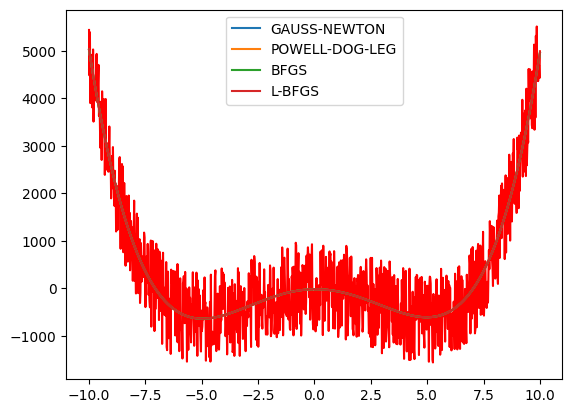

In [676]:
X = np.linspace(test.begin, test.end, test.steps)
plt.plot(test.X, test.Y, 'r-')
for name in res:
    Y = func(X)(res[name][0])
    plt.plot(X, Y, label=name)
plt.legend()

In [677]:
for name in res:
    point, info = res[name]
    print("Method:", name, end='\t')
    print("Point:", point, end='\t')
    print("Error:", sum((test.Y - test.model[0](test.X)(point)) ** 2), end='\t')
    
    from tests import ProcInfo
    print("T:", info.time, end='\t')
    print("M:", info.memory, end='\t')
    print("I:", info.iterations)

Method: GAUSS-NEWTON	Point: [-14.90497349   5.10289548 -48.97932876  -0.0831322    0.99020953]	Error: 313054620.60209334	T: 0.0030927658081054688	M: (42667, 123339)	I: 3
Method: POWELL-DOG-LEG	Point: [-14.90497349   5.10289548 -48.97932876  -0.0831322    0.99020953]	Error: 313054620.60209334	T: 0.026068687438964844	M: (6472, 127304)	I: 18
Method: BFGS	Point: [-14.90497326   5.10289549 -48.97932877  -0.0831322    0.99020954]	Error: 313054620.602093	T: 8.732033729553223	M: (132463, 214391)	I: 790
Method: L-BFGS	Point: [-14.90497349   5.10289548 -48.97932876  -0.0831322    0.99020953]	Error: 313054620.60209334	T: 0.05727863311767578	M: (13884, 94468)	I: 17


In [678]:
x0 = test.init_point
func, jac = test.model
start_time = time.time()
tracemalloc.start()
result = least_squares(lambda x: np.sqrt(2) * (test.Y - func(test.X)(x)), x0, jac=jac(test.X))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [679]:
end_time - start_time, memory, result

(0.008019685745239258,
 (51004, 274291),
      message: `ftol` termination condition is satisfied.
      success: True
       status: 2
          fun: [ 5.915e+02 -6.773e+02 ... -6.675e+02  4.776e+01]
            x: [-1.491e+01  5.103e+00 -4.898e+01 -8.311e-02  9.902e-01]
         cost: 313054620.7800008
          jac: [[-1.000e+00  1.000e+01 ...  1.000e+03 -1.000e+04]
                [-1.000e+00  9.980e+00 ...  9.940e+02 -9.920e+03]
                ...
                [-1.000e+00 -9.980e+00 ... -9.940e+02 -9.920e+03]
                [-1.000e+00 -1.000e+01 ... -1.000e+03 -1.000e+04]]
         grad: [-7.010e+00  7.541e+01 -5.207e+02  5.401e+03 -4.130e+04]
   optimality: 41298.53749947995
  active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
         nfev: 23
         njev: 23)

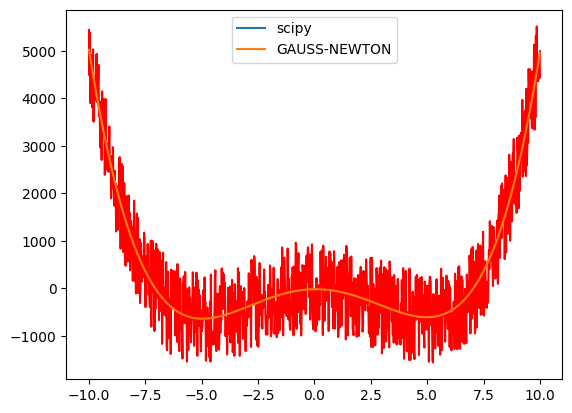

In [680]:
Y = func(X)(result.x)
plt.plot(X, Y, label='scipy')
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(res['GAUSS-NEWTON'][0]), label='GAUSS-NEWTON')
plt.legend()

In [681]:
result.x - res['GAUSS-NEWTON'][0]

array([-8.94959485e-05, -7.97600166e-06,  4.40378881e-05,  2.66874470e-05,
       -3.15632912e-06])

In [682]:
result

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 5.915e+02 -6.773e+02 ... -6.675e+02  4.776e+01]
           x: [-1.491e+01  5.103e+00 -4.898e+01 -8.311e-02  9.902e-01]
        cost: 313054620.7800008
         jac: [[-1.000e+00  1.000e+01 ...  1.000e+03 -1.000e+04]
               [-1.000e+00  9.980e+00 ...  9.940e+02 -9.920e+03]
               ...
               [-1.000e+00 -9.980e+00 ... -9.940e+02 -9.920e+03]
               [-1.000e+00 -1.000e+01 ... -1.000e+03 -1.000e+04]]
        grad: [-7.010e+00  7.541e+01 -5.207e+02  5.401e+03 -4.130e+04]
  optimality: 41298.53749947995
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 23
        njev: 23

In [683]:
result.cost

313054620.7800008

In [684]:
sum((test.Y - test.model[0](test.X)(res['GAUSS-NEWTON'][0])) ** 2)

313054620.60209334

In [685]:
sum((test.Y - test.model[0](test.X)(result.x)) ** 2)

313054620.78000087

In [686]:
start_time = time.time()
tracemalloc.start()
other = least_squares(lambda x: np.sqrt(2) * (test.Y - func(test.X)(x)), x0, jac=jac(test.X),
                      bounds=(-10000, 10000))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

C:\Workspace\study\sem-4\metopts-labs\lab_3\venv\lib\site-packages\scipy\optimize\_lsq\trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
C:\Workspace\study\sem-4\metopts-labs\lab_3\venv\lib\site-packages\scipy\optimize\_lsq\trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new


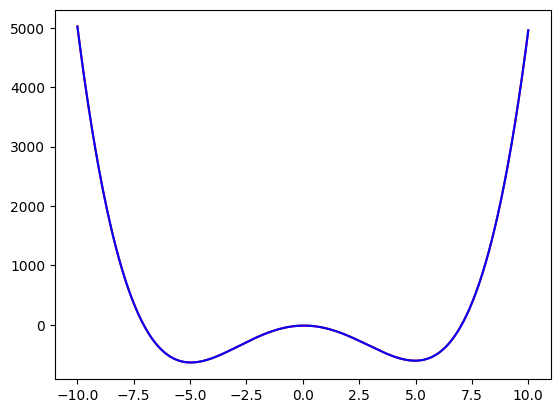

In [687]:
util.show(X, func(X)(result.x), X, func(X)(other.x))

In [688]:
end_time-start_time, memory, other

(0.011954545974731445,
 (52104, 285182),
      message: `ftol` termination condition is satisfied.
      success: True
       status: 2
          fun: [ 5.913e+02 -6.774e+02 ... -6.676e+02  4.767e+01]
            x: [-1.490e+01  5.103e+00 -4.898e+01 -8.312e-02  9.902e-01]
         cost: 313054620.862854
          jac: [[-1.000e+00  1.000e+01 ...  1.000e+03 -1.000e+04]
                [-1.000e+00  9.980e+00 ...  9.940e+02 -9.920e+03]
                ...
                [-1.000e+00 -9.980e+00 ... -9.940e+02 -9.920e+03]
                [-1.000e+00 -1.000e+01 ... -1.000e+03 -1.000e+04]]
         grad: [ 1.282e+01  3.616e+01  9.304e+02  2.582e+03  7.293e+04]
   optimality: 729415820.1692687
  active_mask: [0 0 0 0 0]
         nfev: 22
         njev: 22)

In [689]:
fun = reg.regression_function(test.model[0], test.X, test.Y)
r = reg.regression(test.model[0], test.X, test.Y)
grad = reg.grad(test.X, test.model[1], r)
hess = reg.hessian(test.X, test.model[1])

In [690]:
start_time = time.time()
tracemalloc.start()
result_pdl = minimize(fun,
                      x0,
                      method='dogleg',
                      jac=grad,
                      hess=hess,
                      options={'initial_trust_radius': 1000,
                               'max_trust_radius': 10000})
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [691]:
end_time - start_time, memory, result_pdl

(0.010026216506958008,
 (4172, 125886),
  message: A bad approximation caused failure to predict improvement.
  success: False
   status: 2
      fun: 313054620.60209334
        x: [-1.490e+01  5.103e+00 -4.898e+01 -8.313e-02  9.902e-01]
      nit: 5
      jac: [-3.374e-08 -7.253e-07 -1.197e-06  5.360e-05 -6.194e-04]
     nfev: 7
     njev: 6
     nhev: 6
     hess: [[ 2.000e+03 -9.095e-13 ...  0.000e+00  4.016e+06]
            [-9.095e-13  6.680e+04 ...  4.016e+06  7.451e-09]
            ...
            [ 0.000e+00  4.016e+06 ...  2.874e+08 -4.768e-07]
            [ 4.016e+06  3.725e-09 ...  4.768e-07  2.240e+10]])

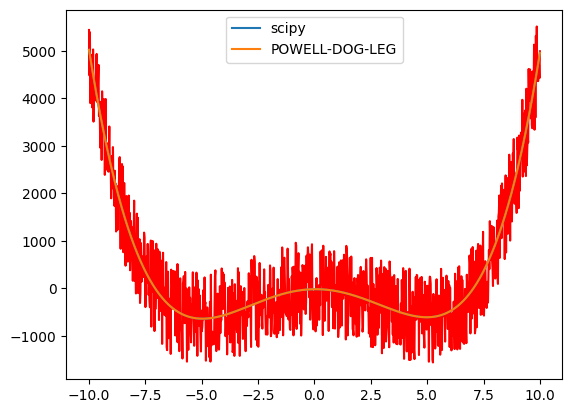

In [692]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_pdl.x), label='scipy')
plt.plot(X, func(X)(res['POWELL-DOG-LEG'][0]), label='POWELL-DOG-LEG')
plt.legend()

In [693]:
start_time = time.time()
tracemalloc.start()
other_pdl = minimize(fun,
                      x0,
                      method='dogleg',
                      jac=grad,
                      hess=hess,
                      options={'initial_trust_radius': 1000,
                               'max_trust_radius': 10000})
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [694]:
end_time - start_time, memory, other_pdl

(0.009024381637573242,
 (4172, 125886),
  message: A bad approximation caused failure to predict improvement.
  success: False
   status: 2
      fun: 313054620.60209334
        x: [-1.490e+01  5.103e+00 -4.898e+01 -8.313e-02  9.902e-01]
      nit: 5
      jac: [-3.374e-08 -7.253e-07 -1.197e-06  5.360e-05 -6.194e-04]
     nfev: 7
     njev: 6
     nhev: 6
     hess: [[ 2.000e+03 -9.095e-13 ...  0.000e+00  4.016e+06]
            [-9.095e-13  6.680e+04 ...  4.016e+06  7.451e-09]
            ...
            [ 0.000e+00  4.016e+06 ...  2.874e+08 -4.768e-07]
            [ 4.016e+06  3.725e-09 ...  4.768e-07  2.240e+10]])

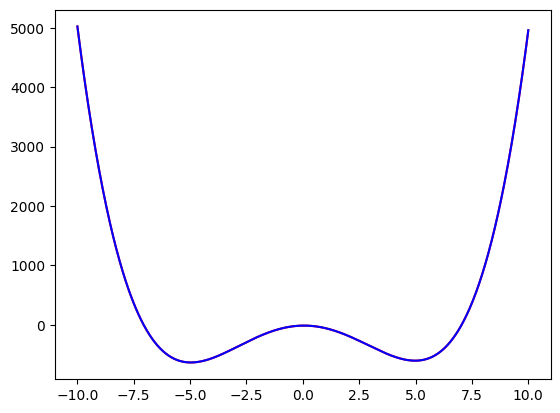

In [695]:
util.show(X, func(X)(result_pdl.x), X, func(X)(other_pdl.x))

In [696]:
start_time = time.time()
tracemalloc.start()
result_bfgs = minimize(fun,
                       x0,
                       method='BFGS',
                       jac=grad)
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [697]:
end_time - start_time, memory, result_bfgs

(0.07872152328491211,
 (4696, 88446),
   message: Desired error not necessarily achieved due to precision loss.
   success: False
    status: 2
       fun: 313054620.602093
         x: [-1.490e+01  5.103e+00 -4.898e+01 -8.313e-02  9.902e-01]
       nit: 10
       jac: [ 4.619e-06 -5.512e-05  4.650e-04 -3.884e-03  3.622e-02]
  hess_inv: [[ 1.758e-03 -1.396e-10 ...  5.620e-11  7.354e-07]
             [-1.396e-10  9.357e-05 ... -1.307e-06 -4.014e-14]
             ...
             [ 5.620e-11 -1.307e-06 ...  2.175e-08  1.676e-14]
             [ 7.354e-07 -4.014e-14 ...  1.676e-14  8.545e-10]]
      nfev: 74
      njev: 63)

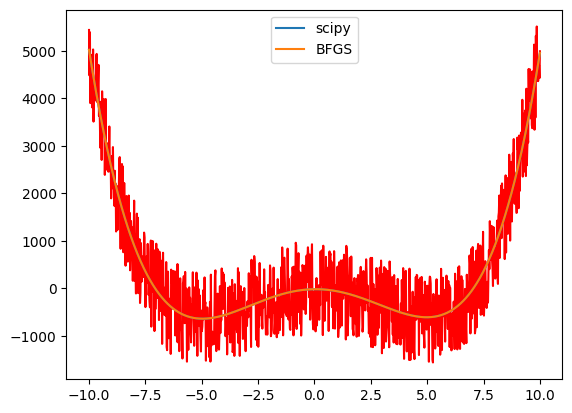

In [698]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_bfgs.x), label='scipy')
plt.plot(X, func(X)(res['BFGS'][0]), label='BFGS')
plt.legend()

In [699]:
reg.regression_function(test.model[0], test.X, test.Y)(result_bfgs.x)

313054620.602093

In [700]:
reg.regression_function(test.model[0], test.X, test.Y)(res['BFGS'][0])

313054620.602093

In [701]:
start_time = time.time()
tracemalloc.start()
other_bfgs = minimize(fun,
                      x0,
                      method='BFGS',
                      jac=grad,
                      options={
                          'finite_diff_rel_step': [(-0.1, 0.1) for i in range(len(x0))]
                      })
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

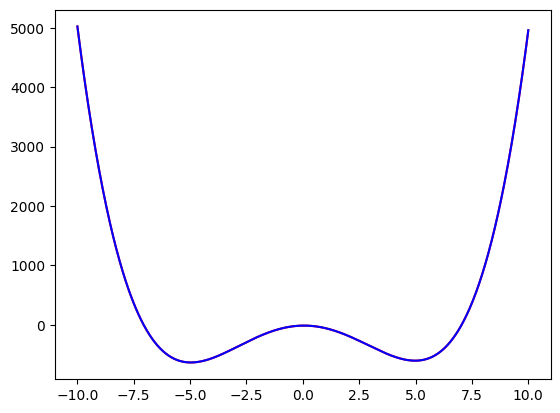

In [702]:
util.show(X, func(X)(result_bfgs.x), X, func(X)(other_bfgs.x))

In [703]:
start_time = time.time()
tracemalloc.start()
result_lbfgs = minimize(fun, x0, method='L-BFGS-B', jac=grad)
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [704]:
end_time - start_time, memory, result_lbfgs

(0.0730900764465332,
 (15139, 98025),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 313054620.616396
         x: [-1.490e+01  5.102e+00 -4.898e+01 -8.311e-02  9.902e-01]
       nit: 64
       jac: [ 2.116e+00 -9.471e+00  1.596e+02  3.117e+02  1.397e+04]
      nfev: 75
      njev: 75
  hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>)

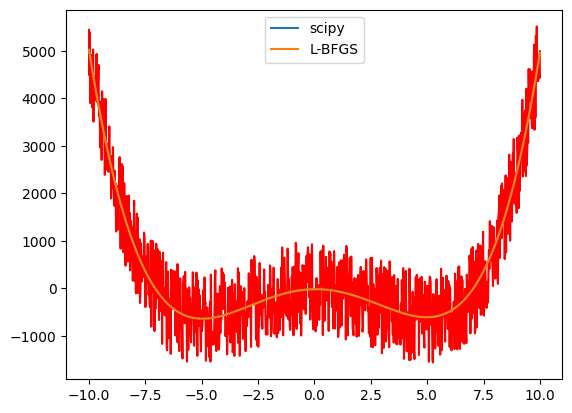

In [705]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_lbfgs.x), label='scipy')
plt.plot(X, func(X)(res['L-BFGS'][0]), label='L-BFGS')
plt.legend()

In [706]:
fun(result_lbfgs.x)

313054620.616396

In [707]:
fun(res['L-BFGS'][0])

313054620.60209334

In [708]:
start_time = time.time()
tracemalloc.start()
other_lbfgs = minimize(fun,
                      x0,
                      method='L-BFGS-B',
                      jac=grad,
                      bounds=((-10000., 10000.) for i in range(len(x0))))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

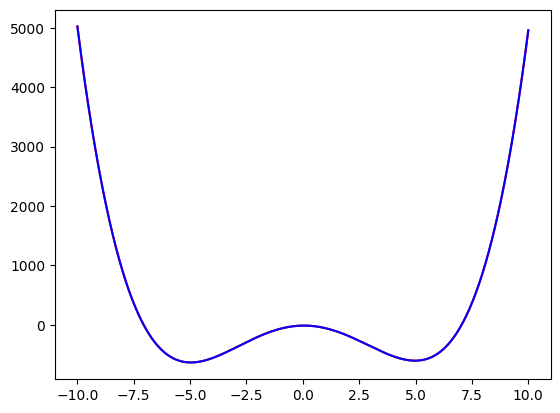

In [709]:
util.show(X, func(X)(result_lbfgs.x), X, func(X)(other_lbfgs.x))

In [710]:
end_time - start_time, memory, other_lbfgs

(0.02507781982421875,
 (15332, 98785),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 313054620.60210407
         x: [-1.491e+01  5.103e+00 -4.898e+01 -8.313e-02  9.902e-01]
       nit: 13
       jac: [-3.259e-02 -4.569e-01  3.470e-01 -1.452e+00  6.163e+00]
      nfev: 23
      njev: 23
  hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>)

In [711]:
import torch

def f(point):
    x, y = point[0], point[1]
    return x ** 2 - x * y + y ** 2 + 9 * x - 6 * y + 20

def gradient(point):
    x, y = point[0], point[1]
    return np.array([2 * x - y + 9, -x + 2 * y - 6])

pt = [1., 0.]
betta0 = torch.tensor(pt, requires_grad=True)

In [712]:
betta0

tensor([1., 0.], requires_grad=True)

In [713]:
y = f(betta0)

In [714]:
y

tensor(30., grad_fn=<AddBackward0>)

In [715]:
y.backward()

In [716]:
betta0.grad

tensor([11., -7.])

In [717]:
gradient(betta0.detach().numpy())

array([11., -7.])

In [718]:
import gradient

In [719]:
gradient.analytic(f, dim=2)(pt)

array([11.0000000000000, -7.00000000000000], dtype=object)

In [720]:
gradient.calc(f)(pt)

array([11.0001, -6.9999])

In [721]:
def polynom(params):
    return (lambda point: sum(params[i] * point[i] ** 2 for i in range(len(point))),
            lambda point: np.array([2 * params[i] * point[i] for i in range(len(point))]))

In [722]:
import time

def test(func, grad, point):
    def run(calc_grad_func_name, calc_grad_func):
        start_time = time.time()
        tracemalloc.start()
        g = calc_grad_func()
        end_time = time.time()
        memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        
        print()
        print(calc_grad_func_name)
        print("time:", end_time - start_time)
        print("memory:", memory)
        print("error:", sum((grad(point) - g) ** 2))
    
    def calc_torch():
        betta0 = torch.tensor(point, requires_grad=True)
        y = func(betta0)
        y.backward()
        tor = betta0.grad.detach().numpy()
        return tor
    dim = len(point)
    
    methods = {
        'torch': calc_torch,
        'calculate': lambda *args: gradient.calc(func)(point),
        'hardcode': lambda *args: grad(point),
        'sympy analys': lambda *args: gradient.analytic(func, dim)(point)
    }
    
    for name in methods:
        run(name, methods[name])
    

In [723]:
dim = 200
f, g = polynom([random.randint(-100, 100000) for i in range(dim)])
test(f, g, [1. for i in range(dim)])


torch
time: 0.01013636589050293
memory: (628, 15332)
error: 0.0

calculate
time: 0.06309056282043457
memory: (1696, 12144)
error: 6659.170728944129

hardcode
time: 0.0
memory: (4096, 5760)
error: 0.0

sympy analys
time: 13.603718042373657
memory: (2021407, 2124735)
error: 0
